In [13]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import os

from huggingface_hub import hf_hub_download, HfFileSystem, snapshot_download

sns.set_theme(
    palette=sns.color_palette("colorblind"),
    font="Times New Roman",
    font_scale=2.2,
    style="whitegrid",
)
sns.axes_style(
    style = {"axes.linewidth":4}
)

REPO = "boettiger-lab/rl4eco"
PATH_IN_REPO = "rl4fisheries-reproducing/"
FS = HfFileSystem()

SAVE_LOC = "figures/"
DATA_LOC = "data/" + PATH_IN_REPO

In [14]:
UM1_pol = pd.read_csv(DATA_LOC + "UM1_policies.csv")
UM2_pol = pd.read_csv(DATA_LOC + "UM2_policies.csv")
UM3_pol = pd.read_csv(DATA_LOC + "UM3_policies.csv")

In [15]:
Ut_name = "Expl. Rate U_t"

for df in [UM1_pol, UM2_pol, UM3_pol]:
    df.columns = ["0", "biomass", Ut_name, "policy", "policy type"]
    df = df.drop("0", axis=1)


In [16]:
colorblind4 = sns.color_palette("colorblind", 4)
virids8 = sns.color_palette("viridis", 8)
policy_fn_palette = sns.color_palette(
    [*colorblind4, *virids8], 12
)
policy_fn_palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

In [20]:
UM1_pol["utility function"] = "Harvested Biomass"
UM2_pol["utility function"] = "HARA"
UM3_pol["utility function"] = "Trophy Fishing"

policies_df = pd.concat(
    [UM1_pol, UM2_pol, UM3_pol]
).drop(
    axis=1, # drop a column
    labels="0",
)

policies_df.head()

,biomass,Expl. Rate U_t,policy,policy type,utility function
0,0.000000,0.132164,Const. Mort.,Other Policies,Harvested Biomass
1,0.007014,0.132164,Const. Mort.,Other Policies,Harvested Biomass
2,0.014028,0.132164,Const. Mort.,Other Policies,Harvested Biomass
3,0.021042,0.132164,Const. Mort.,Other Policies,Harvested Biomass
4,0.028056,0.132164,Const. Mort.,Other Policies,Harvested Biomass


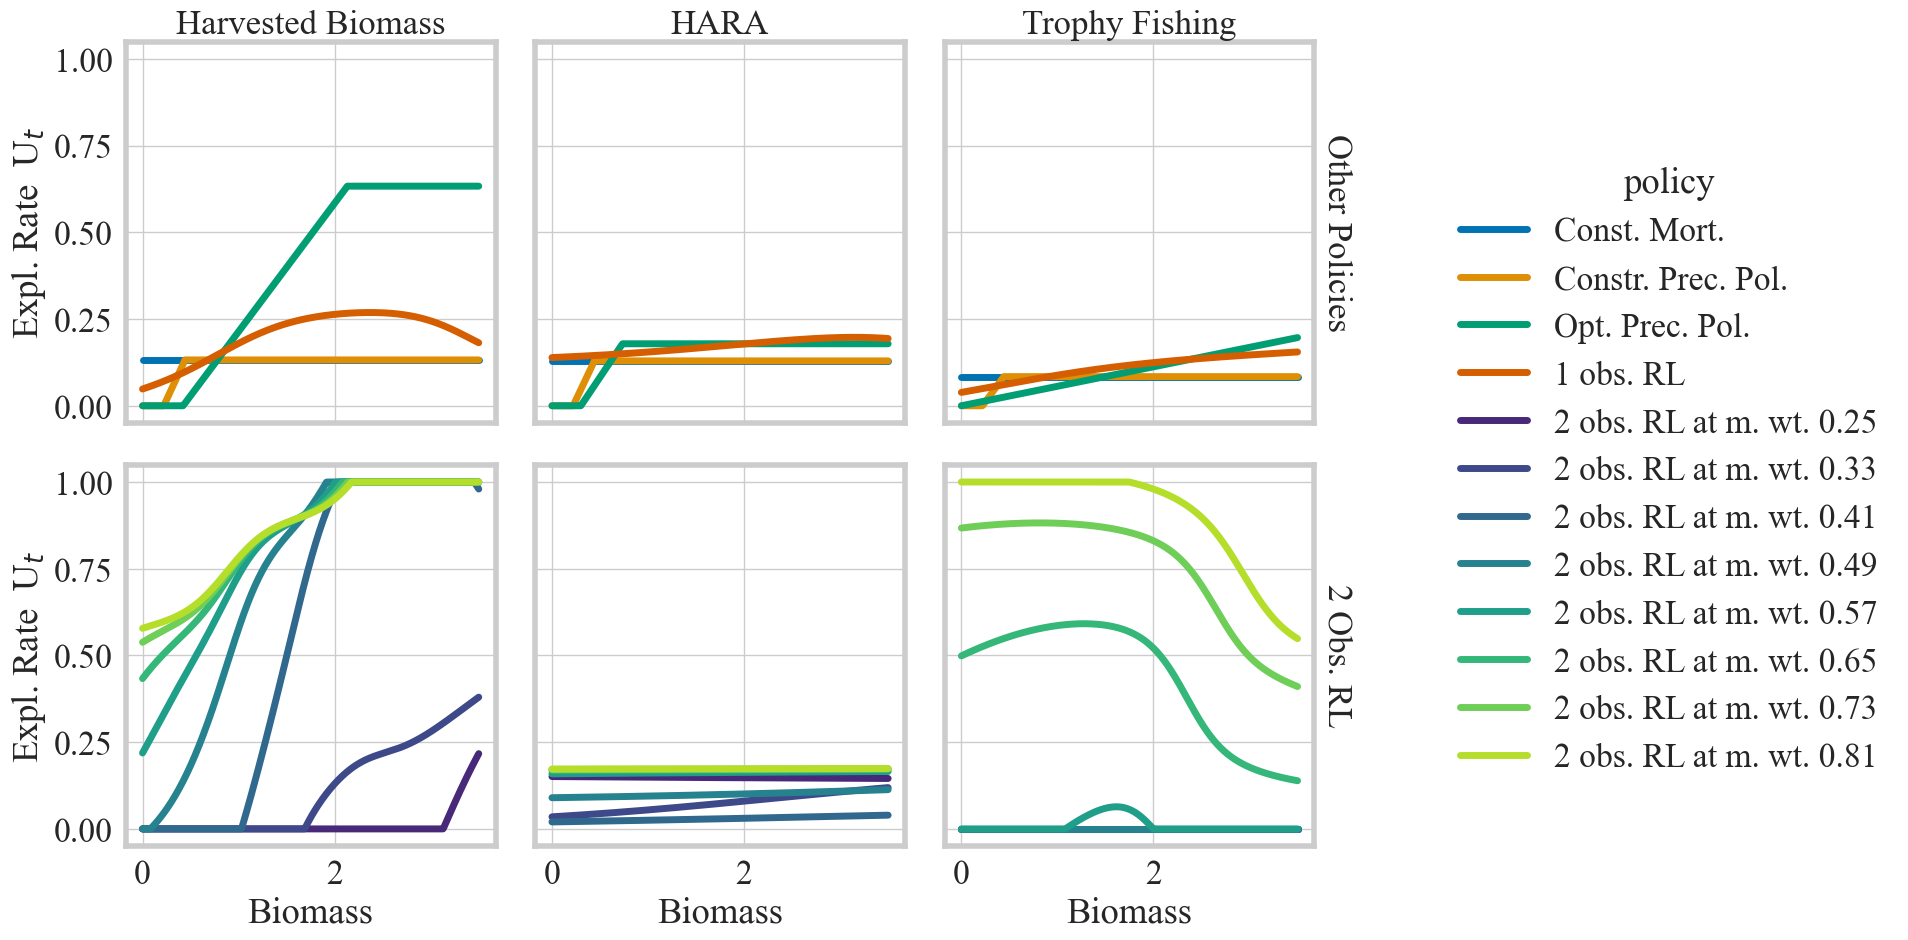

In [21]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 4

g=sns.relplot(
    policies_df, 
    y=Ut_name, 
    x='biomass',
    hue='policy', 
    row='policy type',
    col='utility function',
    kind='line',
    linewidth=5,
    palette = policy_fn_palette,
    facet_kws = dict(margin_titles=True),
)
plural_singular = {"Other": "policies", "2 Obs. RL": "policy"}
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=25)
g.set_axis_labels("Biomass", "Expl. Rate  U$_t$")
g.tight_layout()
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 
        # if idx in [0, 1, 2]:
        #     pass # utility fn already will be title
        # if idx == 2:
        #       ax.set_title("Other Policies", loc="right")
g.savefig(SAVE_LOC + "policies.jpeg")
g